In [2]:
import networkx as nx
from parse import read_input_file, write_output_file
from utils import is_valid_network, average_pairwise_distance_fast
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
class DisjointSet:
    def __init__(self, vertices):
        self.vertices = [[v,0] for v in range(vertices)]            
#         self.vertexset = [v for v in vertices]
    
#     def add(self, vertex):
#         if self.contains(vertex):
#             return False
#         self.vertices.append([vertex, 0])
#         return True
    
    def contains(self, vertex):
        return vertex in [x[0] for x in self.vertices]
    
    def find(self, x):
        if x != self.vertices[x][0]:
            self.vertices[x][0] = self.find(self.vertices[x][0])
        return self.vertices[x][0]

    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if self.vertices[rootx][1] > self.vertices[rooty][1]:
            self.vertices[rooty][0] = rootx
        else:
            self.vertices[rootx][0] = rooty
            if self.vertices[rootx][1] == self.vertices[rooty][1]:
                self.vertices[rooty][1] += 1

In [7]:
ds = DisjointSet(5)
ds.union(1,2)
ds.find(1) == ds.find(2)
ds.union(2,4)
ds.find(4) == ds.find(3)

False

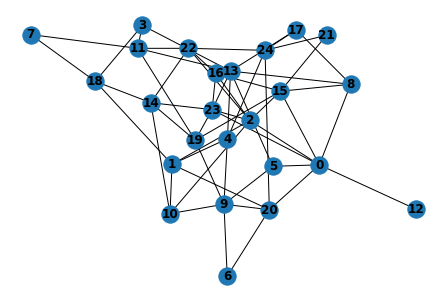

In [141]:
G = read_input_file('inputs/small-7.in')
F =  read_input_file('inputs/small-7.in')
nx.draw(G, with_labels=True, font_weight='bold')

In [126]:
l = list(G.edges.data('weight'))

In [135]:
F.nodes == G.nodes

True

In [132]:
G.nodes

NodeView((0, 2, 5, 8, 12, 15, 20, 23, 1, 4, 10, 18, 16, 22, 3, 11, 13, 9, 24, 6, 7, 17, 19, 14, 21))

In [127]:
l.sort(key=lambda x: x[2])

In [128]:
l

[(20, 24, 0.16),
 (20, 6, 0.77),
 (8, 13, 0.85),
 (0, 15, 0.93),
 (2, 22, 1.05),
 (2, 10, 1.48),
 (10, 14, 1.76),
 (11, 19, 1.86),
 (11, 7, 2.11),
 (1, 10, 2.37),
 (2, 1, 2.38),
 (8, 15, 2.89),
 (0, 2, 3.24),
 (0, 23, 3.52),
 (2, 23, 3.8),
 (23, 16, 4.07),
 (20, 1, 4.13),
 (0, 12, 4.16),
 (0, 8, 4.25),
 (1, 18, 4.25),
 (24, 17, 4.37),
 (18, 7, 4.55),
 (5, 13, 4.73),
 (11, 13, 4.91),
 (22, 11, 5.15),
 (23, 19, 5.16),
 (8, 17, 5.24),
 (15, 19, 5.31),
 (19, 14, 5.75),
 (4, 24, 6.03),
 (15, 21, 6.07),
 (0, 5, 6.37),
 (3, 13, 6.52),
 (18, 3, 6.68),
 (15, 16, 6.76),
 (3, 11, 6.85),
 (1, 4, 6.95),
 (22, 24, 7.25),
 (20, 9, 7.46),
 (18, 14, 7.49),
 (2, 15, 7.7),
 (9, 19, 8.04),
 (5, 9, 8.15),
 (4, 13, 8.21),
 (16, 22, 8.65),
 (13, 17, 8.92),
 (22, 14, 8.99),
 (2, 16, 9.1),
 (23, 14, 9.11),
 (24, 21, 9.16),
 (9, 6, 9.41),
 (23, 13, 9.54),
 (4, 9, 9.57),
 (10, 9, 9.84),
 (0, 20, 9.88)]

In [39]:
list(G.edges([1]))


[(1, 2), (1, 4), (1, 10), (1, 18), (1, 20)]

In [40]:
G.adj[1]

AtlasView({2: {'weight': 2.38}, 4: {'weight': 6.95}, 10: {'weight': 2.37}, 18: {'weight': 4.25}, 20: {'weight': 4.13}})

In [41]:
total = 0
for i in range(len(list(G.edges([1])))):
    total += G.edges[list(G.edges([1]))[i]]['weight']
    print(total)

2.38
9.33
11.7
15.95
20.08


In [42]:
g = nx.Graph()
g.add_node(1)
g.add_node(1)
g.add_node(2)
list(g.nodes())
g.add_edge(1,2)
g.remove_node(2)
g.edges

EdgeView([])

In [57]:
degrees = list((G.degree(G.nodes())))
degrees.sort(key=lambda i:i[1], reverse=True)
degrees
G.nodes

NodeView((0, 2, 5, 8, 12, 15, 20, 23, 1, 4, 10, 18, 16, 22, 3, 11, 13, 9, 24, 6, 7, 17, 19, 14, 21))

In [65]:
G.edges[1,2]['weight']

2.38

In [103]:
def solve(G):
    """
       Args:
           G: networkx.Graph

       Returns:
           T: networkx.Graph
       """

    class DisjointSet:
        def __init__(self, vertices):
            self.vertices = [[v, 0] for v in range(vertices)]

        def contains(self, vertex):
            return vertex in [x[0] for x in self.vertices]

        def find(self, x):
            if x != self.vertices[x][0]:
                self.vertices[x][0] = self.find(self.vertices[x][0])
            return self.vertices[x][0]

        def union(self, x, y):
            rootx = self.find(x)
            rooty = self.find(y)
            if self.vertices[rootx][1] > self.vertices[rooty][1]:
                self.vertices[rooty][0] = rootx
            else:
                self.vertices[rootx][0] = rooty
                if self.vertices[rootx][1] == self.vertices[rooty][1]:
                    self.vertices[rooty][1] += 1

    degrees = list((G.degree(G.nodes())))
    degrees.sort(key=lambda i:i[1], reverse=True)

    curr_node = degrees[0][0]

    check_tree = DisjointSet(len(G.nodes))

    result = nx.Graph()
    result.add_node(curr_node)
    queue = [curr_node]
    while not nx.is_dominating_set(G, result):
        edge_set = list(G.edges([curr_node]))
        smallest_pairwise_dist = float('inf')
        best_edge = None
        for edge in edge_set:
            print(edge)
            if check_tree.find(curr_node) != check_tree.find(edge[1]) and edge[1] not in list(result.nodes):
                result.add_node(edge[1])
                result.add_edge(edge[0],edge[1],weight=G.edges[curr_node, edge[1]]['weight'])
                if average_pairwise_distance_fast(result) < smallest_pairwise_dist:
                    best_edge = edge
                result.remove_edge(edge[0],edge[1])
                result.remove_node(edge[1])
        if best_edge:
            result.add_node(best_edge[1])
            result.add_edge(curr_node, best_edge[1], weight=G.edges[curr_node, best_edge[1]]['weight'])
            check_tree.union(curr_node, best_edge[1])
            curr_node = best_edge[1]
        else:
            break

    return result   
    

In [104]:
T = solve(G)


(0, 2)
(0, 5)
(0, 8)
(0, 12)
(0, 15)
(0, 20)
(0, 23)
(23, 0)
(23, 2)
(23, 13)
(23, 14)
(23, 16)
(23, 19)
(19, 9)
(19, 11)
(19, 14)
(19, 15)
(19, 23)
(15, 0)
(15, 2)
(15, 8)
(15, 16)
(15, 19)
(15, 21)
(21, 15)
(21, 24)
(24, 4)
(24, 17)
(24, 20)
(24, 21)
(24, 22)
(22, 2)
(22, 11)
(22, 14)
(22, 16)
(22, 24)
(16, 2)
(16, 15)
(16, 22)
(16, 23)
(2, 0)
(2, 1)
(2, 10)
(2, 15)
(2, 16)
(2, 22)
(2, 23)
(10, 1)
(10, 2)
(10, 9)
(10, 14)
(14, 10)
(14, 18)
(14, 19)
(14, 22)
(14, 23)
(18, 1)
(18, 3)
(18, 7)
(18, 14)
(7, 11)
(7, 18)
(11, 3)
(11, 7)
(11, 13)
(11, 19)
(11, 22)
(13, 3)
(13, 4)
(13, 5)
(13, 8)
(13, 11)
(13, 17)
(13, 23)
(17, 8)
(17, 13)
(17, 24)
(8, 0)
(8, 13)
(8, 15)
(8, 17)


In [105]:
nx.is_dominating_set(G,T)

False

0 2
True
0 5
True
0 8
True
0 12
True
0 15
True
0 20
True
0 23
True


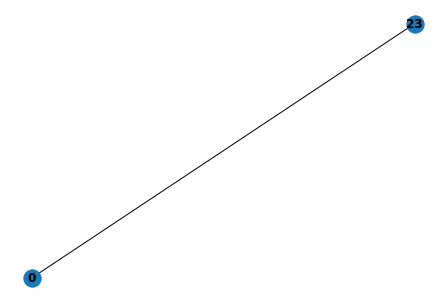

In [96]:
degrees = list((G.degree(G.nodes())))
degrees.sort(key=lambda i:i[1], reverse=True)
curr_node = degrees[0][0]
check_tree = DisjointSet(len(G.nodes))
result = nx.Graph()
result.add_node(curr_node)
edge_set = list(G.edges([curr_node]))
best_edge=None
for edge in edge_set:
    print(edge[0], edge[1])
    print(check_tree.find(curr_node) != check_tree.find(edge[1]) and edge[1] not in list(result.nodes))
    if check_tree.find(curr_node) != check_tree.find(edge[1]) and edge[1] not in list(result.nodes):
        result.add_node(edge[1])
        result.add_edge(edge[0],edge[1],weight=G.edges[curr_node, edge[1]]['weight'])
        if average_pairwise_distance_fast(result) < smallest_pairwise_dist:
            best_edge = edge
        
        result.remove_edge(edge[0],edge[1])
        result.remove_node(edge[1])
result.add_node(best_edge[1])
result.add_edge(curr_node, best_edge[1], weight=G.edges[curr_node, best_edge[1]]['weight'])
nx.draw(result, with_labels=True, font_weight='bold')

In [82]:
list(G.edges([curr_node]))

[(0, 2), (0, 5), (0, 8), (0, 12), (0, 15), (0, 20), (0, 23)]

In [85]:
check_tree.find(edge_set[0][1]) != check_tree.find(0)

True

In [118]:
G = read_input_file('inputs/small-7.in')


In [119]:
result = nx.dominating_set(G,curr_node)
result

{0, 1, 3, 6, 7, 14, 16, 17, 21}

In [115]:
remove = [node for node in G.nodes if node not in result]

In [121]:
G.remove_nodes_from(remove)


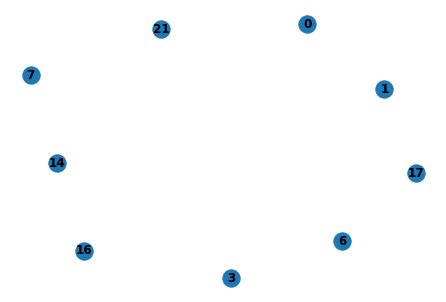

In [122]:
nx.draw(G, with_labels=True, font_weight='bold')

In [172]:
def kruskal(G):
    edges = list(G.edges.data('weight'))
    edges.sort(key=lambda x: x[2])

    result = nx.Graph()

    check_tree = DisjointSet(len(G.nodes))
    
    index = 0
    while not (nx.is_dominating_set(G,result) and nx.is_connected(result)):
        edge = edges[index]
        if check_tree.find(edge[0]) != check_tree.find(edge[1]):
            result.add_node(edge[0])
            result.add_node(edge[1])
            result.add_edge(edge[0],edge[1],weight=edge[2])
            check_tree.union(edge[0],edge[1])
        index+=1
    return result

In [173]:
T = kruskal(G)

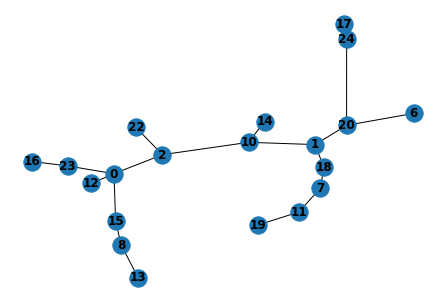

In [174]:
nx.draw(T, with_labels=True, font_weight='bold')

In [178]:
import os
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths 

file_paths = get_all_file_paths('./inputs')

In [208]:
import re
p = re.compile(r'(small-([0-9]+)|medium-([0-9]+)|large-[0-9]+)')
result = p.search(file_paths[0])
result.group(0)

# file_paths[]

'medium-125'

In [154]:
edges = list(G.edges.data('weight'))
edges.sort(key=lambda x: x[2])
check_tree = DisjointSet(len(G.nodes))
result = nx.Graph()
edges

[(20, 24, 0.16),
 (20, 6, 0.77),
 (8, 13, 0.85),
 (0, 15, 0.93),
 (2, 22, 1.05),
 (2, 10, 1.48),
 (10, 14, 1.76),
 (11, 19, 1.86),
 (11, 7, 2.11),
 (1, 10, 2.37),
 (2, 1, 2.38),
 (8, 15, 2.89),
 (0, 2, 3.24),
 (0, 23, 3.52),
 (2, 23, 3.8),
 (23, 16, 4.07),
 (20, 1, 4.13),
 (0, 12, 4.16),
 (0, 8, 4.25),
 (1, 18, 4.25),
 (24, 17, 4.37),
 (18, 7, 4.55),
 (5, 13, 4.73),
 (11, 13, 4.91),
 (22, 11, 5.15),
 (23, 19, 5.16),
 (8, 17, 5.24),
 (15, 19, 5.31),
 (19, 14, 5.75),
 (4, 24, 6.03),
 (15, 21, 6.07),
 (0, 5, 6.37),
 (3, 13, 6.52),
 (18, 3, 6.68),
 (15, 16, 6.76),
 (3, 11, 6.85),
 (1, 4, 6.95),
 (22, 24, 7.25),
 (20, 9, 7.46),
 (18, 14, 7.49),
 (2, 15, 7.7),
 (9, 19, 8.04),
 (5, 9, 8.15),
 (4, 13, 8.21),
 (16, 22, 8.65),
 (13, 17, 8.92),
 (22, 14, 8.99),
 (2, 16, 9.1),
 (23, 14, 9.11),
 (24, 21, 9.16),
 (9, 6, 9.41),
 (23, 13, 9.54),
 (4, 9, 9.57),
 (10, 9, 9.84),
 (0, 20, 9.88)]

In [155]:
edge = edges[0]

In [157]:
check_tree.find(edge[0]) != check_tree.find(edge[1])

True

In [158]:
check_tree.union(edge[0],edge[1])
check_tree.find(edge[0]) != check_tree.find(edge[1])

False

In [162]:
result.add_node(edge[0])
result.add_node(edge[1])
result.add_edge(edge[0],edge[1],weight=edge[2])

In [165]:
result.edges.data('weight')

EdgeDataView([(20, 24, 0.16)])